In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Original Images

In [2]:
results_orig = pd.read_csv(
    './../../data_source/results/original_images/all_features_original_images.csv',
    index_col=0
)
results_orig.head()

,exp_id,experiment_id,XGBoost__learning_rate,XGBoost__max_depth,XGBoost__min_data_in_leaf,XGBoost__min_split_loss,XGBoost__n_estimators,XGBoost__reg_alpha,XGBoost__reg_lambda,test_score,...,KNNEstimator__p,DTreeEstimator__criterion,DTreeEstimator__max_depth,DTreeEstimator__max_features,DTreeEstimator__min_samples_leaf,exp_duration,ExtraTreeEstimator__criterion,ExtraTreeEstimator__max_depth,ExtraTreeEstimator__max_features,ExtraTreeEstimator__min_samples_leaf
0,44,DummySelection_XGBoost,0.010000,100.0,5.0,1.000000e-09,100.0,0.001000,0.001000,0.573626,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,47,DummySelection_XGBoost,0.094933,310.0,3.0,9.223273e-05,28.0,0.439754,39.087705,0.591941,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,DummySelection_XGBoost,16.220063,102.0,2.0,1.109062e-06,42.0,8.857303,37.990424,0.581410,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,DummySelection_XGBoost,0.819048,409.0,10.0,2.724791e-05,142.0,4.405084,79.220194,0.587729,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,DummySelection_XGBoost,0.819048,409.0,10.0,2.724791e-05,142.0,4.405084,79.220194,0.587729,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
results_orig.shape

(4000, 61)

In [4]:
_selector_lbls, _estimator_lbls = [], []
for label in np.unique(results_orig['experiment_id']):
    
    selector_lbl, estimator_lbl = label.split('_')

    _selector_lbls.append(selector_lbl)
    _estimator_lbls.append(estimator_lbl)

selector_lbls = np.unique(_selector_lbls)
estimator_lbls = np.unique(_estimator_lbls)

In [6]:
#to_drop = ['ANOVAFvalueSelection']
#selector_lbls = np.array([label for label in selector_lbls if not label in to_drop])

selector_lbls

array(['ANOVAFvalueSelection', 'ChiSquareSelection', 'DummySelection',
       'FisherScoreSelection', 'MutualInformationSelection',
       'ReliefFSelection', 'StudentTTestSelection', 'WilcoxonSelection'],
      dtype='<U26')

In [7]:
estimator_lbls

array(['DTreeEstimator', 'ElasticNetEstimator', 'ExtraTreeEstimator',
       'KNNEstimator', 'LightGBM', 'LogRegEstimator', 'PLSREstimator',
       'RFEstimator', 'SVCEstimator', 'XGBoost'], dtype='<U19')

In [8]:
orig_results_mat = np.zeros((len(estimator_lbls), len(selector_lbls)))
for row_num, estimator_lbl in enumerate(estimator_lbls):
    for col_num, selector_lbl in enumerate(selector_lbls):
        
        label = f'{selector_lbl}_{estimator_lbl}'
        location = np.where(label == np.array(results_orig['experiment_id']))
        scores = results_orig.iloc[np.squeeze(location), :]['test_score']
        
        orig_results_mat[row_num, col_num] = np.mean(scores)

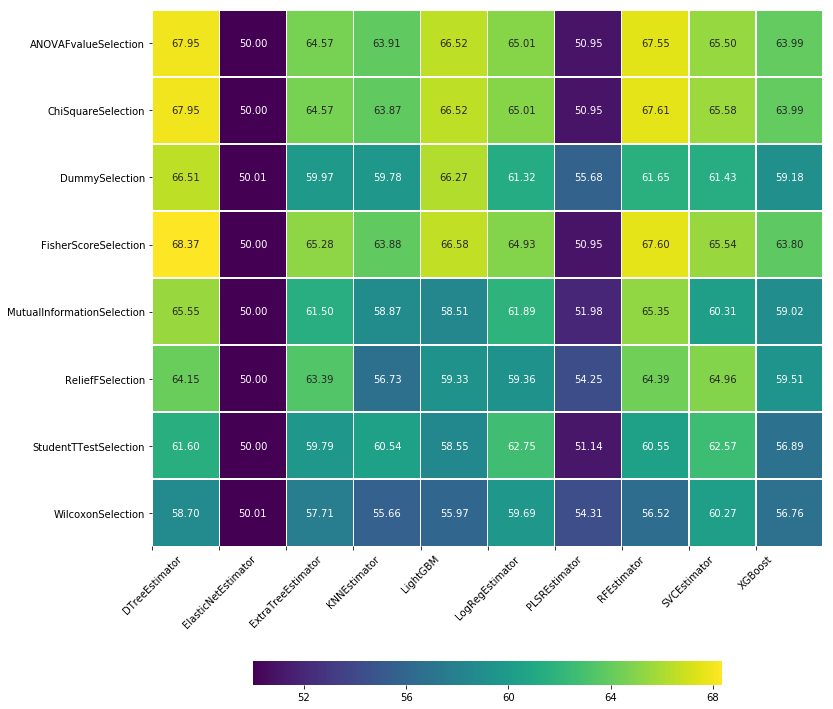

In [9]:
plt.figure(figsize=(11, 11))
hmap = sns.heatmap(
    orig_results_mat.T * 100,
    yticklabels=selector_lbls,
    xticklabels=estimator_lbls,
    vmin=np.nanmin(orig_results_mat) * 100 - 1e-4, 
    vmax=np.nanmax(orig_results_mat) * 100 + 1e-4,
    cmap=plt.cm.viridis, 
    robust=True,
    annot=True, 
    fmt='.2f', 
    square=1, 
    linewidth=.5, 
    cbar=True,
    cbar_kws={'shrink': 0.7, 'orientation': 'horizontal'},  
)
plt.xticks(np.arange(len(estimator_lbls)), rotation=45, ha='center')
plt.tight_layout()
#plt.savefig(
#    './../../../figures/50evals_50reps_univariate_dfs.png',
#    bbox_inches='tight',
#    transparent=True,
#    dpi=100, 
#)

In [40]:
print(np.sum(orig_results_mat > 0.677))
print(np.max(orig_results_mat) - 0.677)

3
0.005514652014652066


## Selected Features

In [84]:
results_orig['feature_votes'][0]

'[10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10\n 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10\n 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10\n 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10\n 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10\n 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10\n 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10\n 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10\n 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10\n 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10\n 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10\n 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10\n 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10\n 10 10 10 10 10 10 10 10 10 10 10 10 

# Removed Broken Slices

In [9]:
results_rs = pd.read_csv(
    './../../data_source/results/removed_broken_slices/all_features_removed_broken_slices.csv',
    index_col=0
)
results_rs.head()

,exp_id,experiment_id,XGBoost__learning_rate,XGBoost__max_depth,XGBoost__min_data_in_leaf,XGBoost__min_split_loss,XGBoost__n_estimators,XGBoost__reg_alpha,XGBoost__reg_lambda,test_score,...,KNNEstimator__n_neighbors,KNNEstimator__p,DTreeEstimator__criterion,DTreeEstimator__max_depth,DTreeEstimator__max_features,DTreeEstimator__min_samples_leaf,ExtraTreeEstimator__criterion,ExtraTreeEstimator__max_depth,ExtraTreeEstimator__max_features,ExtraTreeEstimator__min_samples_leaf
0,44,DummySelection_XGBoost,3.576890,72.0,5.0,0.000033,134.0,0.113967,7.180005,0.614286,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,47,DummySelection_XGBoost,0.679743,84.0,4.0,0.000001,110.0,0.131464,1.164201,0.574542,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,DummySelection_XGBoost,6.691810,230.0,9.0,0.000097,119.0,7.840645,0.454879,0.596429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,DummySelection_XGBoost,0.835361,390.0,10.0,0.000068,173.0,0.635595,7.498201,0.591117,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,DummySelection_XGBoost,0.835361,390.0,10.0,0.000068,173.0,0.635595,7.498201,0.591117,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
results_rs.shape

(4000, 61)

In [11]:
_selector_lbls, _estimator_lbls = [], []
for label in np.unique(results_rs['experiment_id']):
    
    selector_lbl, estimator_lbl = label.split('_')

    _selector_lbls.append(selector_lbl)
    _estimator_lbls.append(estimator_lbl)

selector_lbls = np.unique(_selector_lbls)
estimator_lbls = np.unique(_estimator_lbls)

In [73]:
to_drop = ['ANOVAFvalueSelection']
selector_lbls = np.array([label for label in selector_lbls if not label in to_drop])

selector_lbls

array(['ChiSquareSelection', 'DummySelection', 'FisherScoreSelection',
       'MutualInformationSelection', 'ReliefFSelection',
       'StudentTTestSelection', 'WilcoxonSelection'], dtype='<U26')

In [74]:
estimator_lbls

array(['DTreeEstimator', 'ElasticNetEstimator', 'ExtraTreeEstimator',
       'KNNEstimator', 'LightGBM', 'LogRegEstimator', 'PLSREstimator',
       'RFEstimator', 'SVCEstimator', 'XGBoost'], dtype='<U19')

In [75]:
rs_results_mat = np.zeros((len(estimator_lbls), len(selector_lbls)))
for row_num, estimator_lbl in enumerate(estimator_lbls):
    for col_num, selector_lbl in enumerate(selector_lbls):
        
        label = f'{selector_lbl}_{estimator_lbl}'
        location = np.where(label == np.array(results_rs['experiment_id']))
        scores = results_rs.iloc[np.squeeze(location), :]['test_score']
        
        rs_results_mat[row_num, col_num] = np.mean(scores)

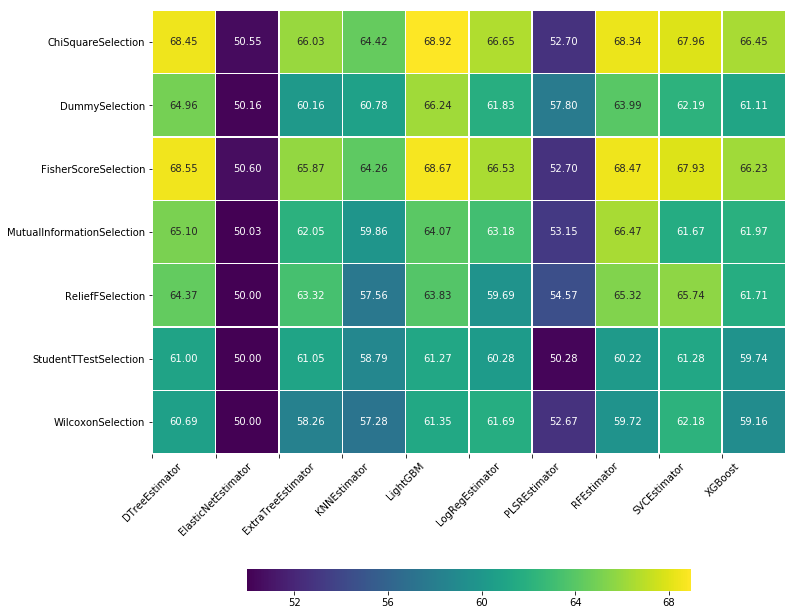

In [78]:
plt.figure(figsize=(11, 11))
hmap = sns.heatmap(
    rs_results_mat.T * 100,
    yticklabels=selector_lbls,
    xticklabels=estimator_lbls,
    vmin=np.nanmin(rs_results_mat) * 100 - 1e-4, 
    vmax=np.nanmax(rs_results_mat) * 100 + 1e-4,
    cmap=plt.cm.viridis, 
    robust=True,
    annot=True, 
    fmt='.2f', 
    square=1, 
    linewidth=.5, 
    cbar=True,
    cbar_kws={'shrink': 0.7, 'orientation': 'horizontal'},  
)
plt.xticks(np.arange(len(estimator_lbls)), rotation=45, ha='center')
plt.tight_layout()
#plt.savefig(
#    './../../../figures/50evals_50reps_univariate_dfs.png',
#    bbox_inches='tight',
#    transparent=True,
#    dpi=100, 
#)

In [41]:
print(np.sum(rs_results_mat > 0.686))
print(np.max(rs_results_mat) - 0.686)

3
0.0032710622710624415


# Difference Matrix

In [19]:
diff_mat = rs_results_mat - orig_results_mat

print(np.sum(diff_mat < 0))
print(np.sum(diff_mat > 0))
print(np.sum(diff_mat == 0))

18
60
2


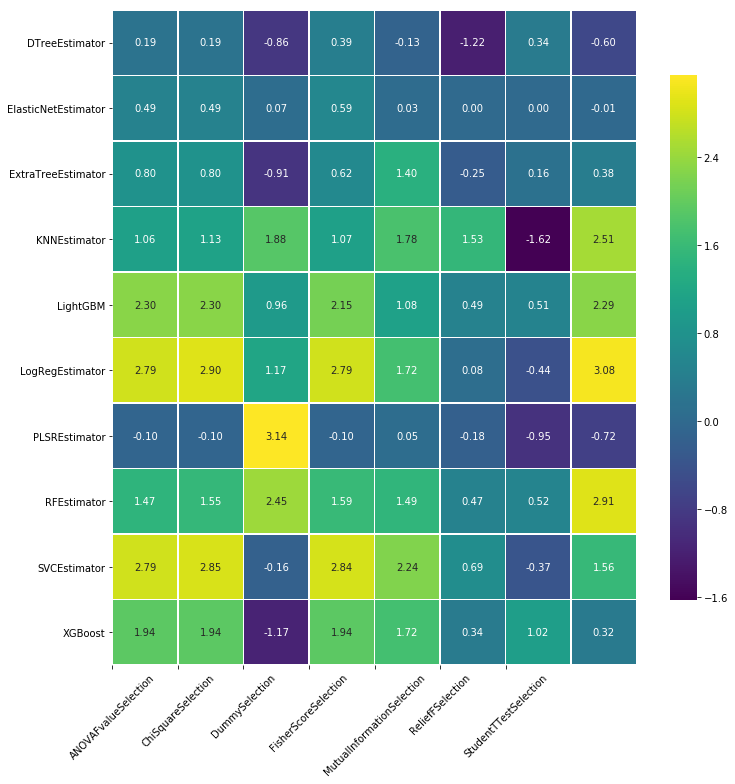

In [20]:
plt.figure(figsize=(11, 11))
sns.heatmap(
    diff_mat * 100,
    xticklabels=selector_lbls,
    yticklabels=estimator_lbls,
    vmin=np.nanmin(diff_mat) * 100 - 1e-4, 
    vmax=np.nanmax(diff_mat) * 100 + 1e-4,
    cmap=plt.cm.viridis, 
    robust=True,
    annot=True, 
    fmt='.2f', 
    square=1, 
    linewidth=.5, 
    cbar=True,
    cbar_kws={'shrink': 0.8},  
)
plt.xticks(np.arange(7), rotation=45, ha='center')
plt.tight_layout()
#plt.savefig(
#    './../../../figures/50evals_50reps_univariate_dfs.png',
#    bbox_inches='tight',
#    transparent=True,
#    dpi=100, 
#)